In [1]:
from astropy.io import fits
import numpy as np

In [2]:
# Open the background spectrum file (sky + instrument + particle)
# hdu = fits.open('spectrum.ds')
hdu = fits.open('pntffg_spectrum.ds')

In [3]:
# Open the background spectrum file (quiescent particle background, with filter wheel closed => no sky)
hdu_qpb = fits.open('pn_qpb_spectrum.fits')

In [4]:
hdu.info()

Filename: pntffg_spectrum.ds
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     434   ()      
  1  SPECTRUM      1 BinTableHDU     69   4096R x 2C   [I, J]   
  2  GTI00002      1 BinTableHDU     41   1127R x 2C   [D, D]   
  3  GTI00102      1 BinTableHDU     41   1127R x 2C   [D, D]   
  4  GTI00202      1 BinTableHDU     41   1127R x 2C   [D, D]   
  5  GTI00302      1 BinTableHDU     41   1127R x 2C   [D, D]   
  6  GTI00402      1 BinTableHDU     41   1127R x 2C   [D, D]   
  7  GTI00502      1 BinTableHDU     41   1127R x 2C   [D, D]   
  8  GTI00602      1 BinTableHDU     41   1091R x 2C   [D, D]   
  9  GTI00702      1 BinTableHDU     41   1091R x 2C   [D, D]   
 10  GTI00802      1 BinTableHDU     41   1091R x 2C   [D, D]   
 11  GTI00902      1 BinTableHDU     41   1075R x 2C   [D, D]   
 12  GTI01002      1 BinTableHDU     41   1075R x 2C   [D, D]   
 13  GTI01102      1 BinTableHDU     41   1075R x 2C   [D, D]   


In [5]:
hdu_qpb.info()

Filename: pn_qpb_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      94   ()      
  1  SPECTRUM      1 BinTableHDU     78   4096R x 2C   [I, J]   
  2  GTI00003      1 BinTableHDU     29   79R x 2C   [D, D]   
  3  REG00104      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   
  4  GTI00103      1 BinTableHDU     29   79R x 2C   [D, D]   
  5  GTI00203      1 BinTableHDU     29   79R x 2C   [D, D]   
  6  GTI00303      1 BinTableHDU     29   81R x 2C   [D, D]   
  7  GTI00403      1 BinTableHDU     29   81R x 2C   [D, D]   
  8  GTI00503      1 BinTableHDU     29   81R x 2C   [D, D]   
  9  GTI00603      1 BinTableHDU     29   80R x 2C   [D, D]   
 10  GTI00703      1 BinTableHDU     29   80R x 2C   [D, D]   
 11  GTI00803      1 BinTableHDU     29   80R x 2C   [D, D]   
 12  GTI00903      1 BinTableHDU     29   80R x 2C   [D, D]   
 13  GTI01003      1 BinTableHDU     29   80R x 2C   [D, D]   
 14  GTI01103      1 BinT

In [6]:
bin_factor = hdu['SPECTRUM'].header['SPECDELT']
channels = hdu['SPECTRUM'].data['CHANNEL']

# Calculate the rate based on the counts
counts = hdu['SPECTRUM'].data['COUNTS'].astype(np.float32)
rates = counts / float(hdu['SPECTRUM'].header['EXPOSURE'])

In [7]:
hdu['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

In [8]:
bin_factor_qpb = hdu['SPECTRUM'].header['SPECDELT']
channels_qpb = hdu_qpb['SPECTRUM'].data['CHANNEL']
# Calculate the rate based on the counts
counts_qpb = hdu_qpb['SPECTRUM'].data['COUNTS'].astype(np.float32)
rates_qpb = counts_qpb / float(hdu_qpb['SPECTRUM'].header['EXPOSURE'])

In [9]:
hdu_qpb['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

[]

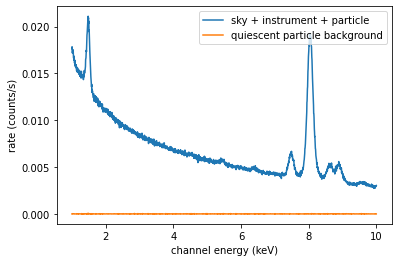

In [10]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(5,3))
emin = 0.5 #keV
emax = 2  #keV
emin = 1 #keV
emax = 10  #keV
bin_factor = hdu['SPECTRUM'].header['SPECDELT']
channel_index_range = range(int(emin*1000/float(bin_factor)), int(emax*1000/float(bin_factor)))
x = channels[channel_index_range]*bin_factor/1000
plt.plot(x, rates[channel_index_range], label="sky + instrument + particle")
plt.plot(x, rates_qpb[channel_index_range], label="quiescent particle background")
# plt.yscale("log")
# plt.xscale("log")

plt.ylabel("rate (counts/s)")
plt.xlabel("channel energy (keV)")
plt.legend()
# plt.savefig("background_noise.pdf")
plt.plot()

In [11]:
hdu['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

In [12]:
channels

array([   0,    1,    2, ..., 4093, 4094, 4095], dtype=int16)

In [13]:
channels_qpb

array([   0,    1,    2, ..., 4093, 4094, 4095], dtype=int16)

In [14]:
channel_col = fits.Column('CHANNEL', format='J', unit = ' ', array=channels) #dim=f'{channels.shape}', 
rate_col = fits.Column('RATE', format='D', unit = 'cts/s/bin/m/m', array=rates) #dim=f'{rates.shape}', 

coldefs = fits.ColDefs([channel_col, rate_col])
spectrum_hdr = fits.Header()
# Include the headers

spectrum_hdr['TUNIT1'] = ''
spectrum_hdr['TUNIT2'] = 'cts/s/bin/m/m'
spectrum_hdr['SPECDELT'] = bin_factor

# vignet_hdr['INSTRUME'] = 'EPIC-PN'
spectrum_hdr.add_history('Produced by Sam Sweere (ESAC Trainee) according to the paper: The XMM-Newton EPIC background and the production of background blank sky event files by Carter, J. A.; Read, A. M.')
spectrum_hdr = fits.BinTableHDU.from_columns(coldefs, header=spectrum_hdr)
spectrum_hdr.name = 'SPECTRUM'

# Create the final hdul
primary_hdu = fits.PrimaryHDU()
hdul = fits.HDUList([primary_hdu, spectrum_hdr])

In [15]:
# Save the new fits file
hdul.writeto('xmm_pn_phabackground.fits', overwrite=True)

# Convert spectrum to Write to ascii file

cgi-units = counts per sec / ecf

In [16]:
ECF=6.95e11 #cts/erg/cm^2/s

bin_factor = hdu['SPECTRUM'].header['SPECDELT']
energies = channels*bin_factor/1000

# Calculate the rate based on the counts
counts = hdu['SPECTRUM'].data['COUNTS'].astype(np.float32)
rates = counts / float(hdu['SPECTRUM'].header['EXPOSURE'])

In [17]:
energies

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 2.0465e+01, 2.0470e+01,
       2.0475e+01])

In [23]:
pixel_size = 150e-4 #cm #based of: https://www.cosmos.esa.int/web/xmm-newton/boundaries-pn
resolution = 402
surface = (pixel_size*resolution)**2 #cm**2
cgi_rates = rates/surface #photon/s/cm**2/keV

In [24]:
with open("background_spectrum.txt", "w") as f:
    for i in range(len(cgi_rates)):
        rate = cgi_rates[i]#*1.0e-4 #cgi_rates[i]
        energy_bin = energies[i]
        f.write(f"{energy_bin} {rate}")
        f.write("\n")

        print(f"{energy_bin} keV: {rate} photon/s/cm**2/keV")

0.0 keV: 0.0 photon/s/cm**2/keV
0.005 keV: 0.0 photon/s/cm**2/keV
0.01 keV: 0.0 photon/s/cm**2/keV
0.015 keV: 0.0 photon/s/cm**2/keV
0.02 keV: 0.0 photon/s/cm**2/keV
0.025 keV: 0.0 photon/s/cm**2/keV
0.03 keV: 0.0 photon/s/cm**2/keV
0.035 keV: 0.0 photon/s/cm**2/keV
0.04 keV: 0.0 photon/s/cm**2/keV
0.045 keV: 0.0 photon/s/cm**2/keV
0.05 keV: 0.0 photon/s/cm**2/keV
0.055 keV: 0.0 photon/s/cm**2/keV
0.06 keV: 0.0 photon/s/cm**2/keV
0.065 keV: 0.0 photon/s/cm**2/keV
0.07 keV: 0.0 photon/s/cm**2/keV
0.075 keV: 0.0 photon/s/cm**2/keV
0.08 keV: 0.0 photon/s/cm**2/keV
0.085 keV: 0.0 photon/s/cm**2/keV
0.09 keV: 0.0 photon/s/cm**2/keV
0.095 keV: 0.0 photon/s/cm**2/keV
0.1 keV: 0.0 photon/s/cm**2/keV
0.105 keV: 0.0 photon/s/cm**2/keV
0.11 keV: 0.0 photon/s/cm**2/keV
0.115 keV: 0.0 photon/s/cm**2/keV
0.12 keV: 0.0 photon/s/cm**2/keV
0.125 keV: 0.0 photon/s/cm**2/keV
0.13 keV: 0.0 photon/s/cm**2/keV
0.135 keV: 0.0 photon/s/cm**2/keV
0.14 keV: 0.0 photon/s/cm**2/keV
0.145 keV: 0.0 photon/s/cm**2/k

In [26]:
with open("background_spectrum.txt", "w") as f:
    for i in range(len(cgi_rates)-1):
        rate = cgi_rates[i]
        energy_bin_lo = energies[i]
        energy_bin_hi = energies[i+1]
        f.write(f"{energy_bin_lo} {energy_bin_hi} {rate}")
        f.write("\n")

        print(f"{energy_bin_lo} - {energy_bin_hi} keV: {rate} cts/erg/cm^2/s")

0.0 - 0.005 keV: 0.0 cts/erg/cm^2/s
0.005 - 0.01 keV: 0.0 cts/erg/cm^2/s
0.01 - 0.015 keV: 0.0 cts/erg/cm^2/s
0.015 - 0.02 keV: 0.0 cts/erg/cm^2/s
0.02 - 0.025 keV: 0.0 cts/erg/cm^2/s
0.025 - 0.03 keV: 0.0 cts/erg/cm^2/s
0.03 - 0.035 keV: 0.0 cts/erg/cm^2/s
0.035 - 0.04 keV: 0.0 cts/erg/cm^2/s
0.04 - 0.045 keV: 0.0 cts/erg/cm^2/s
0.045 - 0.05 keV: 0.0 cts/erg/cm^2/s
0.05 - 0.055 keV: 0.0 cts/erg/cm^2/s
0.055 - 0.06 keV: 0.0 cts/erg/cm^2/s
0.06 - 0.065 keV: 0.0 cts/erg/cm^2/s
0.065 - 0.07 keV: 0.0 cts/erg/cm^2/s
0.07 - 0.075 keV: 0.0 cts/erg/cm^2/s
0.075 - 0.08 keV: 0.0 cts/erg/cm^2/s
0.08 - 0.085 keV: 0.0 cts/erg/cm^2/s
0.085 - 0.09 keV: 0.0 cts/erg/cm^2/s
0.09 - 0.095 keV: 0.0 cts/erg/cm^2/s
0.095 - 0.1 keV: 0.0 cts/erg/cm^2/s
0.1 - 0.105 keV: 0.0 cts/erg/cm^2/s
0.105 - 0.11 keV: 0.0 cts/erg/cm^2/s
0.11 - 0.115 keV: 0.0 cts/erg/cm^2/s
0.115 - 0.12 keV: 0.0 cts/erg/cm^2/s
0.12 - 0.125 keV: 0.0 cts/erg/cm^2/s
0.125 - 0.13 keV: 0.0 cts/erg/cm^2/s
0.13 - 0.135 keV: 0.0 cts/erg/cm^2/s
0.13

# Overwrite the simputfile with the background values

In [37]:
from astropy.io import fits
hdu = fits.open('/home/sam/Documents/ESA/data/sim/tmp/final.simput')

In [44]:
hdu['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   64 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                32768 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / label for field   1                            
TFORM1  = '1PE(4096)'          / data format of field: variable length array    
TUNIT1  = 'keV     '           / physical unit of field                         
TTYPE2  = 'FLUXDENSITY'        / label for field   2                            
TFORM2  = '1PE(4096)'       

In [43]:
hdu['SPECTRUM'].data['ENERGY']

_VLF([array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 2.0465e+01, 2.0470e+01,
       2.0475e+01], dtype=float32)], dtype=object)

In [45]:
hdu['SPECTRUM'].data['FLUXDENSITY']

_VLF([array([0.        , 0.        , 0.        , ..., 0.00020688, 0.00023358,
       0.0002358 ], dtype=float32)], dtype=object)

In [46]:
hdu['SPECTRUM'].data['NAME']

chararray([''], dtype='<U48')